In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,recall_score,precision_score

#Read Data

In [2]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

#

In [3]:
df=pd.concat([df1,df2],axis=0, ignore_index=True,sort=False)

In [4]:
cat_features=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_features.append(col)

In [5]:
import pickle as pkl
from sklearn.preprocessing import LabelEncoder

for col in cat_features:

    le=LabelEncoder()

    df[col]=le.fit_transform(df[col])

    pkl.dump(le,open("{}_le.pkl".format(col),"wb"))


In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [6]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dropna(inplace=True)
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [9]:
def column_info(data):
  cols=[]
  dtype=[]
  unique_v=[]
  n_unique_v=[]

  for col in df.columns:
    cols.append(col)
    dtype.append(data[col].dtype.name)
    unique_v.append(data[col].unique())
    n_unique_v.append(data[col].nunique())

  return pd.DataFrame({'name':cols,'data type':dtype,'unique_Values':unique_v,'no_unique':n_unique_v})


In [10]:
column_info(df)

,name,data type,unique_Values,no_unique
0,Gender,object,"[Male, Female]",2
1,Customer Type,object,"[Loyal Customer, disloyal Customer]",2
2,Age,int64,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 3...",75
3,Type of Travel,object,"[Personal Travel, Business travel]",2
4,Class,object,"[Eco Plus, Business, Eco]",3
5,Flight Distance,int64,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 8...",3821
6,Inflight wifi service,int64,"[3, 2, 4, 1, 5, 0]",6
7,Departure/Arrival time convenient,int64,"[4, 2, 5, 3, 1, 0]",6
8,Ease of Online booking,int64,"[3, 2, 5, 4, 1, 0]",6
9,Gate location,int64,"[1, 3, 2, 5, 4, 0]",6


#The Final result for the clients if they are satisfied or (neural or dissatisfied)

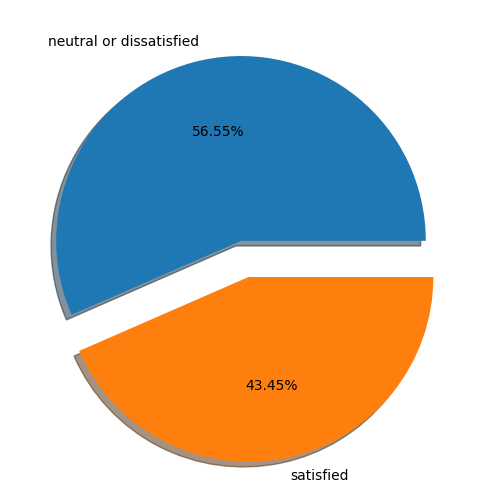

In [11]:
plt.figure(figsize=(8,6))
plt.pie(
    x=df['satisfaction'].value_counts(),
    labels= df['satisfaction'].unique(),
    shadow=True,
    explode=[0.0 ,.2],
    autopct="%.2f%%"
    )
plt.show()
# the majority of the clients are neutral or not satisfied but not by far

#Insigtes from Features of the Data

In [12]:
df['Age'].min()


np.int64(7)

In [13]:
df['Age'].max()


np.int64(85)

#Percentage of Males and Female

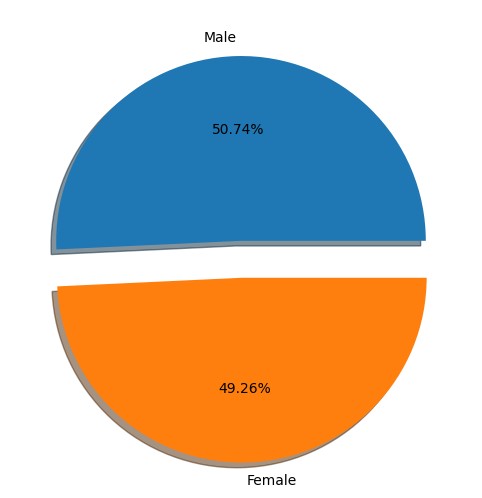

In [14]:
plt.figure(figsize=(8,6))
plt.pie(
    x=df['Gender'].value_counts(),
    labels= df['Gender'].unique(),
    shadow=True,
    explode=[0.0 ,.2],
    autopct="%.2f%%"
    )
plt.show()
#males and females nearly  has roughly the same

#Males satisfaction

<Axes: xlabel='satisfaction', ylabel='count'>

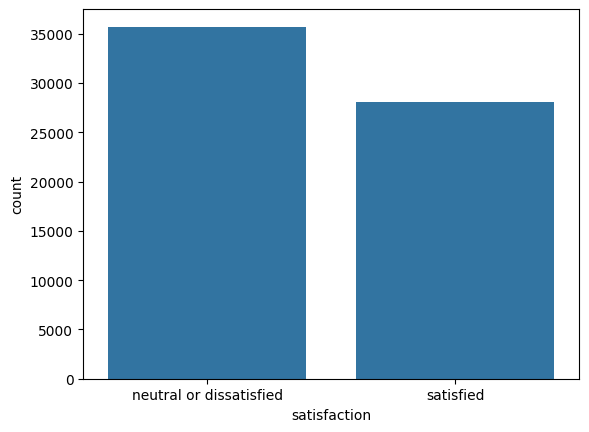

In [15]:
sns.countplot(data=df[df['Gender'] =='Male'], x='satisfaction')
#men are usually show less satisfaction

#Females satisfaction

<Axes: xlabel='satisfaction', ylabel='count'>

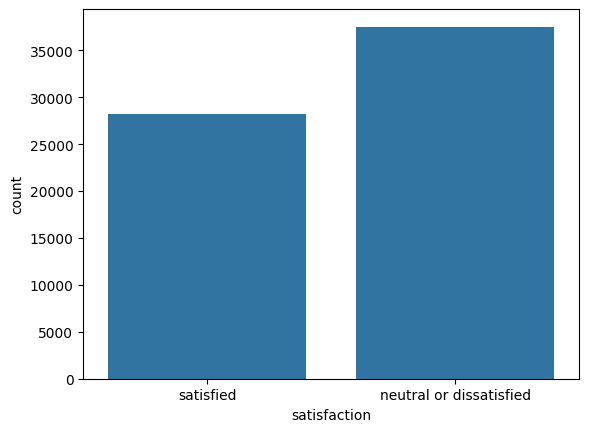

In [16]:
sns.countplot(data=df[df['Gender'] =='Female'], x='satisfaction')
#females show less satisfaction also but more than men

#Check outlires for Flight Distance

<Axes: xlabel='Flight Distance'>

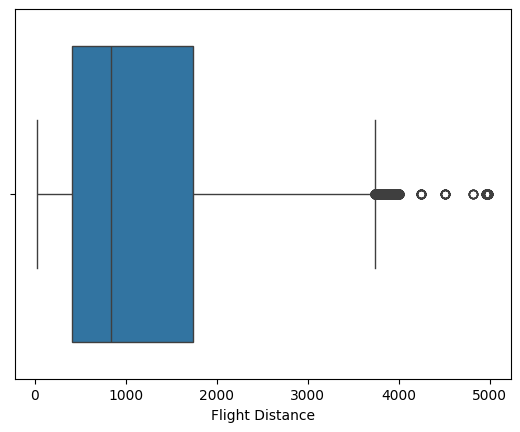

In [17]:
sns.boxplot(data=df['Flight Distance'],orient='h')
#Looks like we have outliers

<Axes: xlabel='Flight Distance', ylabel='count'>

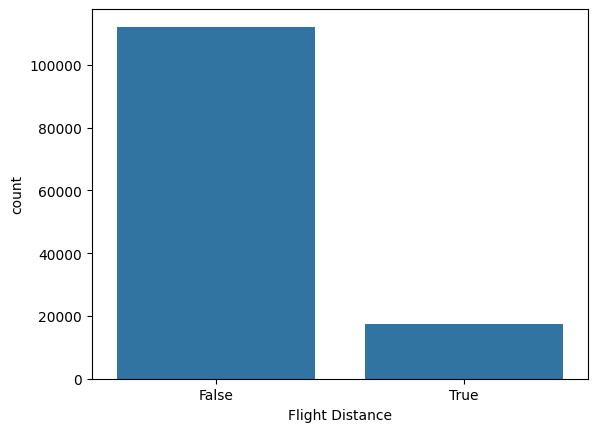

In [18]:
sns.countplot(data=df, x=df['Flight Distance']>2500)
# we can remove outliers without affecting the data count

#Removing Outlires of Flight Distance more than >>>>>>2500

#Check for Outlires for Arrival and Departure  Delay in Minutes

<Axes: xlabel='Departure Delay in Minutes'>

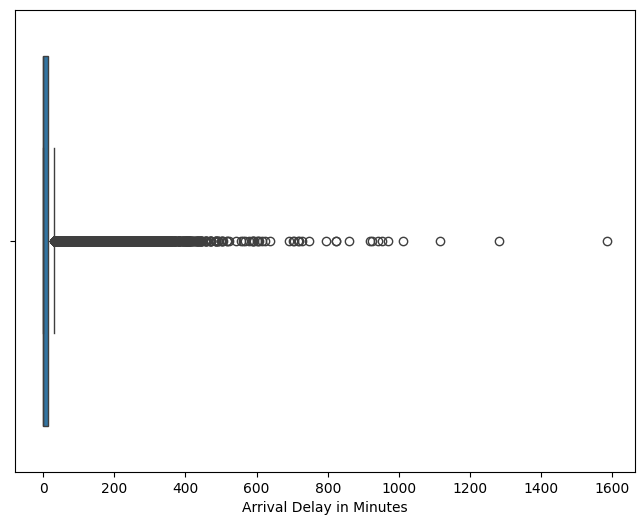

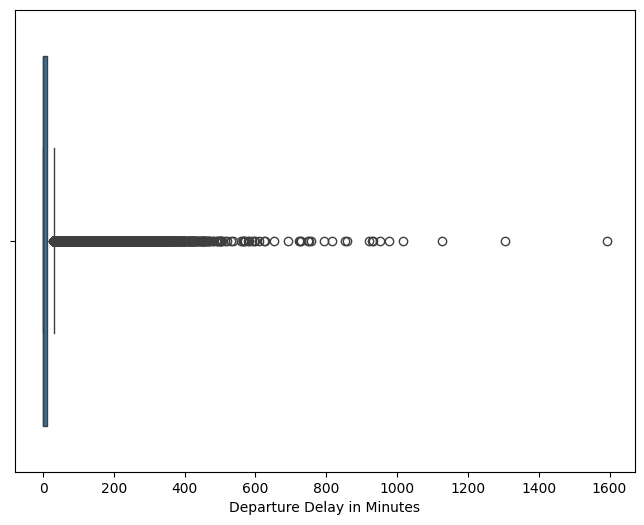

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['Arrival Delay in Minutes'],orient='y')
plt.figure(figsize=(8,6))
sns.boxplot(data=df['Departure Delay in Minutes'],orient='y')
# both categories are suffering from out liers


#Finding the Relation between Class and Seat comfort

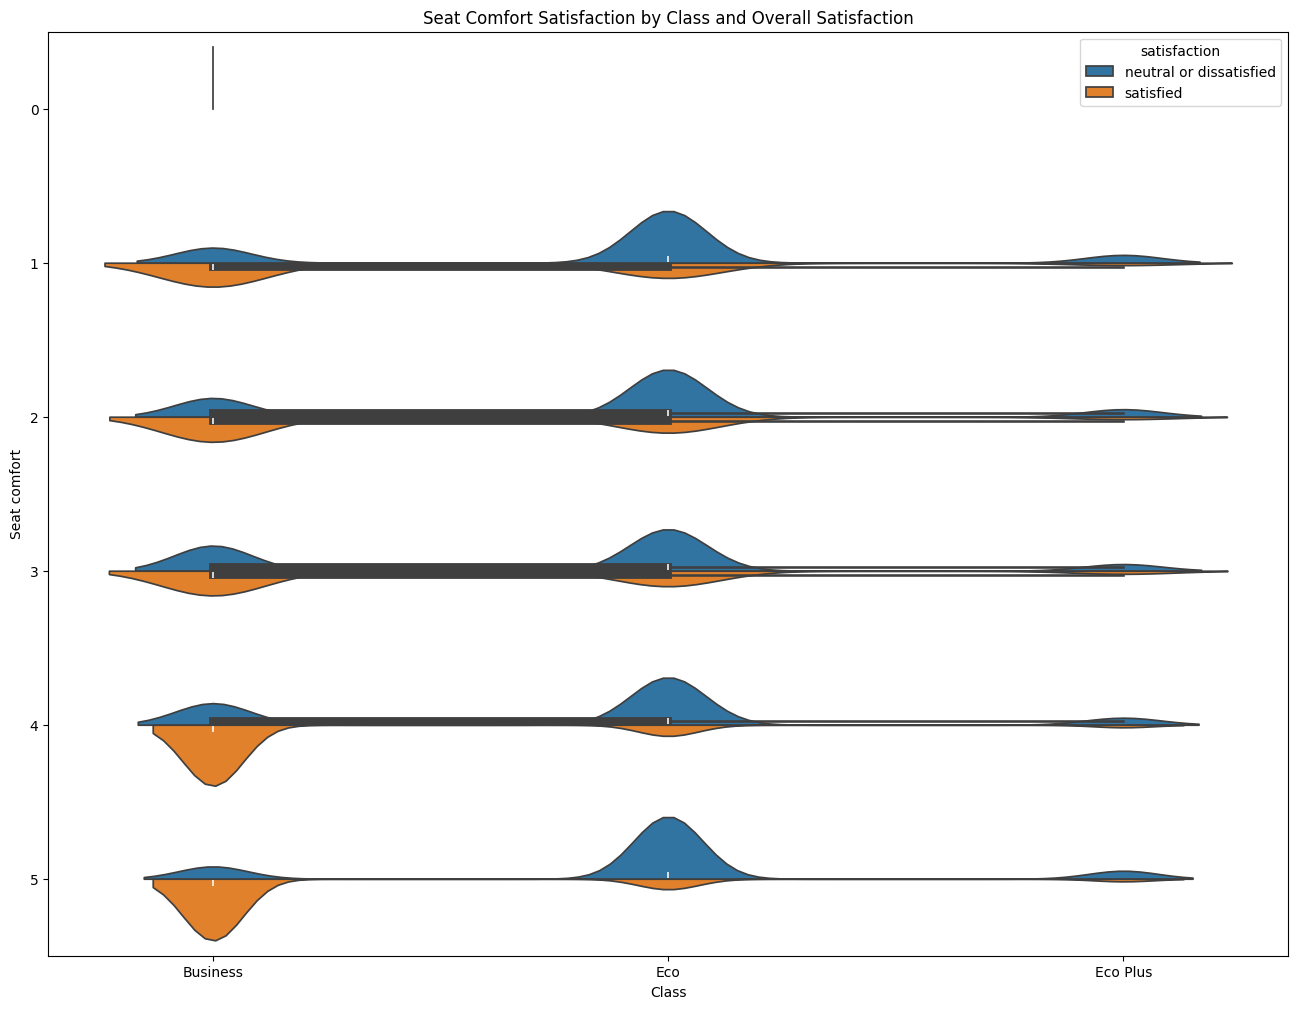

In [20]:
plt.figure(figsize=(16, 12))
sns.violinplot(x='Class', y='Seat comfort',hue='satisfaction', data=df,orient='h', split=True)
plt.title('Seat Comfort Satisfaction by Class and Overall Satisfaction')
plt.show()
# bussiness class shows satisfaction no matter what there level of seat comfort but eco shows less even when the seat comfort level is high
#eco plus doesn't show that much maybe becuse we have fewer data for them

#Show the loyality of the Customers

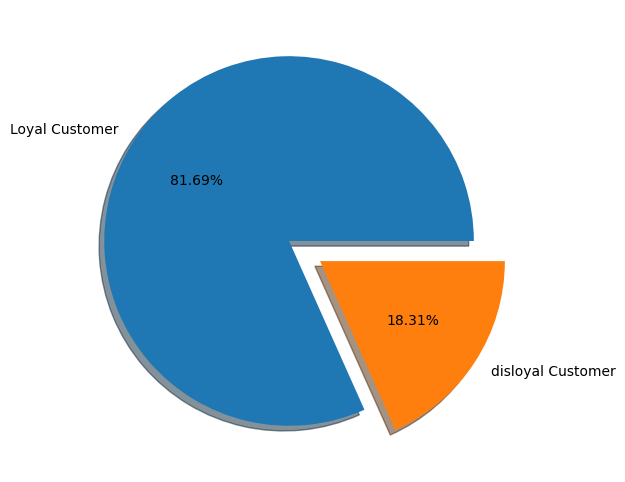

In [21]:
plt.figure(figsize=(8,6))
plt.pie(
    x=df['Customer Type'].value_counts(),
    labels= df['Customer Type'].unique(),
    shadow=True,
    explode=[0.0 ,.2],
    autopct="%.2f%%"
    )
plt.show()
#almost of the clients are loyal
# that means we can't get new customer

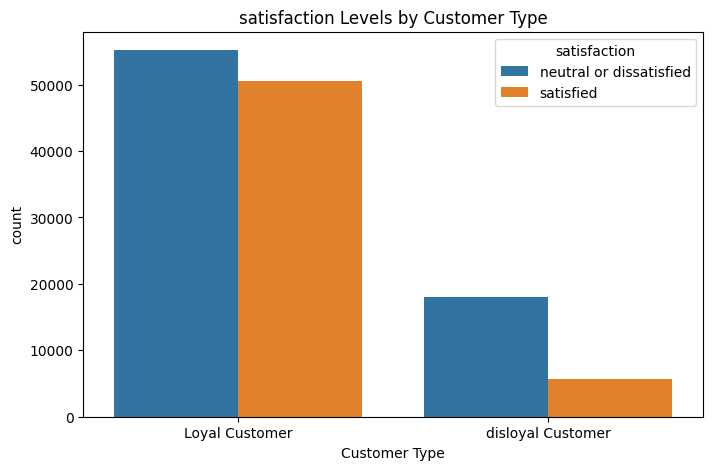

In [22]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Customer Type', hue='satisfaction', data=df)
plt.title('satisfaction Levels by Customer Type')
plt.show()
#loyal customers are genralley more satisfed than disloyal customers , maybe because loyal customers are used to the service they don't even
#some of the flaws any more unlike disloyal customers that are new to the service

#Show the Effect of 'Type of Travel' on satisfaction

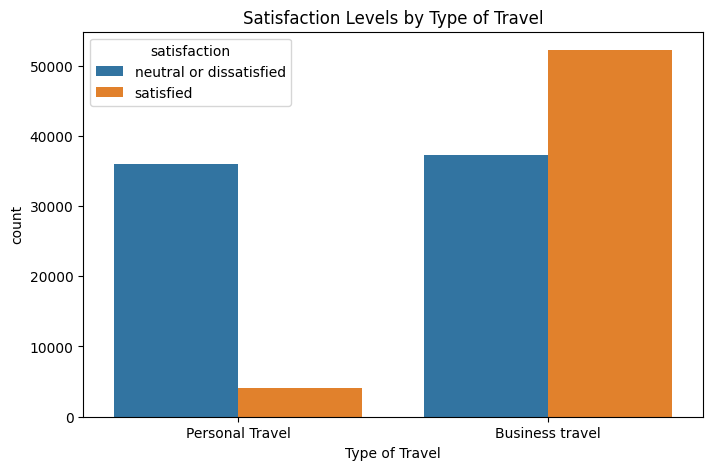

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Type of Travel', hue='satisfaction', data=df)
plt.title('Satisfaction Levels by Type of Travel')
plt.show()
##
# people that using Business Travel are more satisfied than people using Presonal travel maybe because of the Service and the entertainment they find

#Showning the majority of customers if Personal or Business

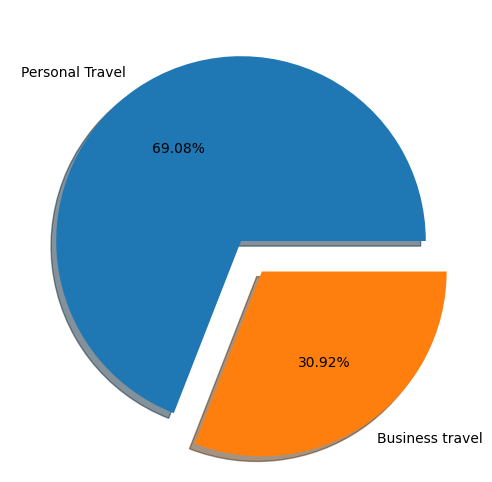

In [24]:
plt.figure(figsize=(8,6))
plt.pie(
    x=df['Type of Travel'].value_counts(),
    labels= df['Type of Travel'].unique(),
    shadow=True,
    explode=[0.0 ,.2],
    autopct="%.2f%%"
    )
plt.show()
# the majority of travellers ar personal Travel

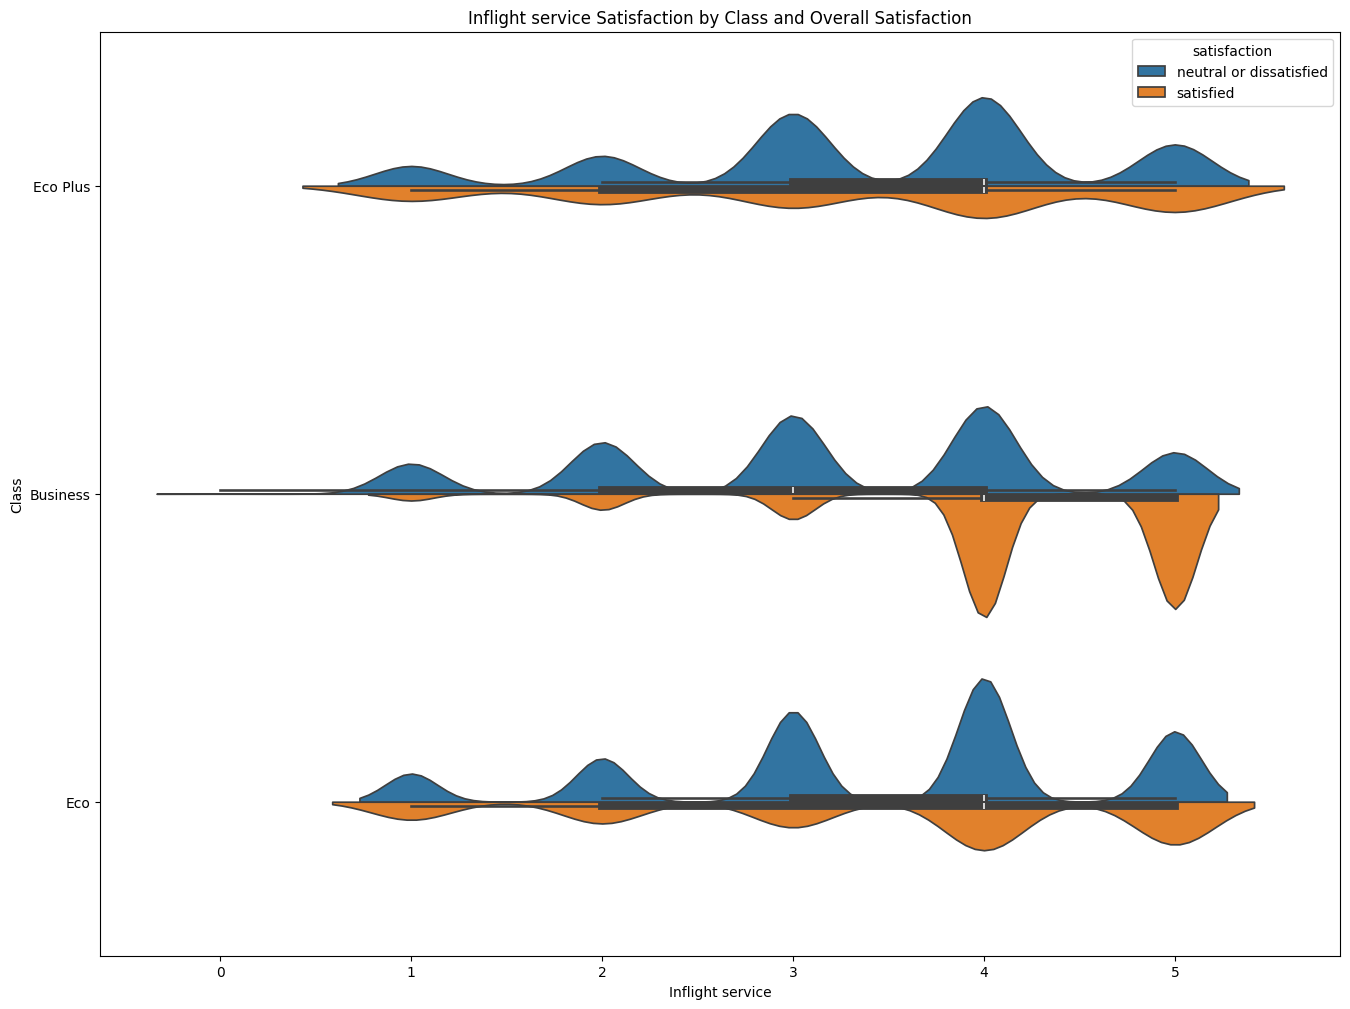

In [25]:
plt.figure(figsize=(16, 12))
sns.violinplot(x='Inflight service', y='Class',hue='satisfaction', data=df,orient='h', split=True)
plt.title('Inflight service Satisfaction by Class and Overall Satisfaction')
plt.show()
#inflight service before 4 are bad as hell 4 is neutral as it seems 

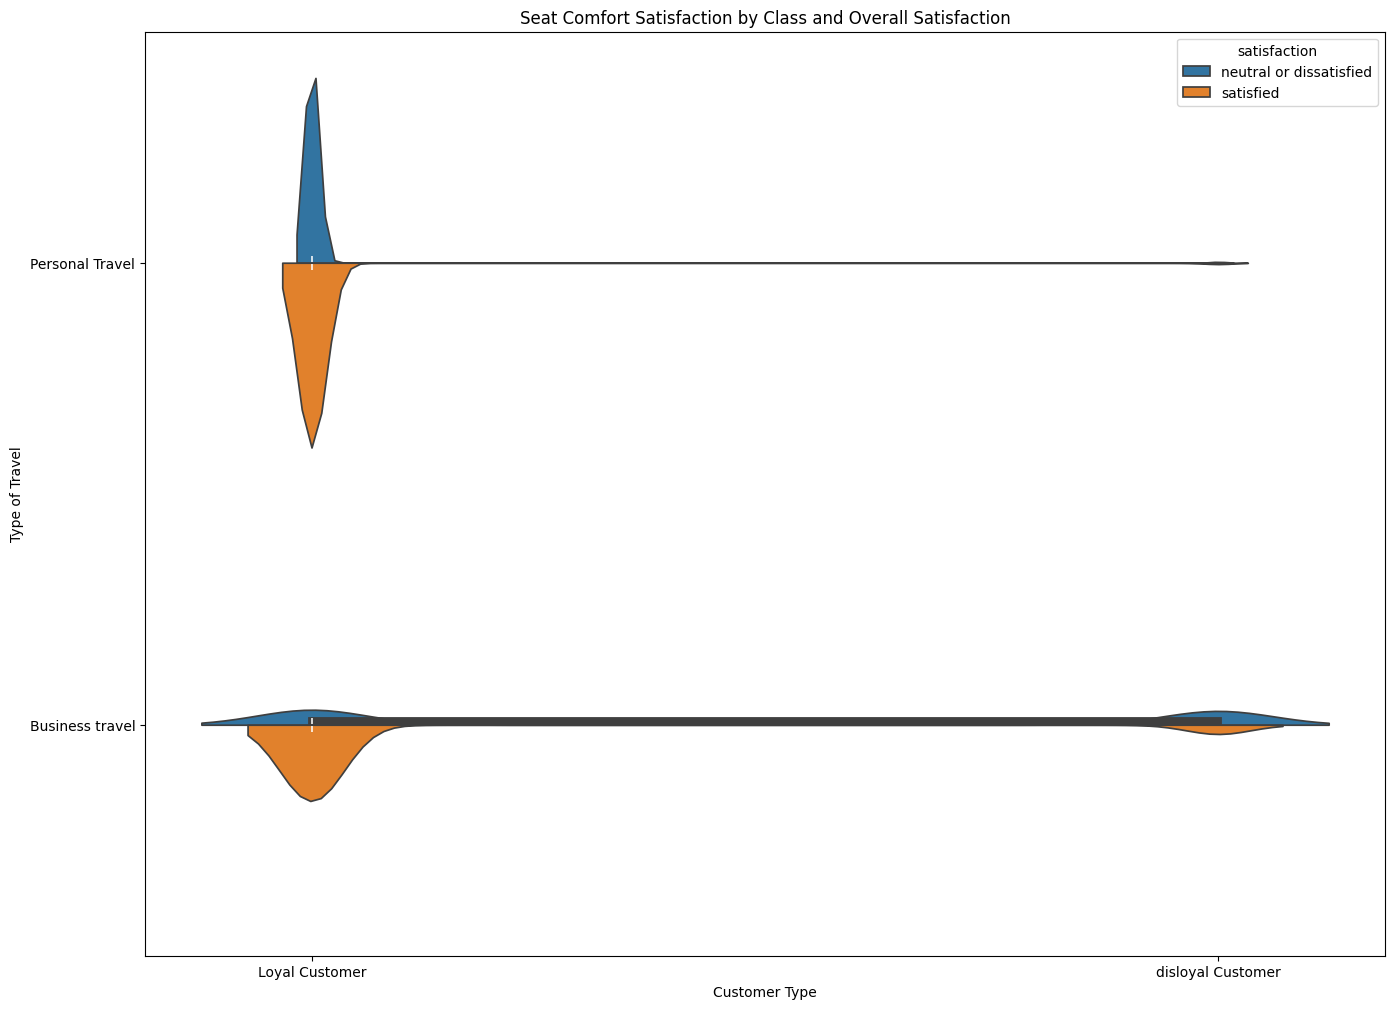

In [26]:
plt.figure(figsize=(16, 12))
sns.violinplot(x='Customer Type', y='Type of Travel',hue='satisfaction', data=df,orient='h', split=True)
plt.title('Seat Comfort Satisfaction by Class and Overall Satisfaction')
plt.show()

#Showing the Layers of Travelling if Eco plus or bussines class or Eco        who almost use type of Travelling

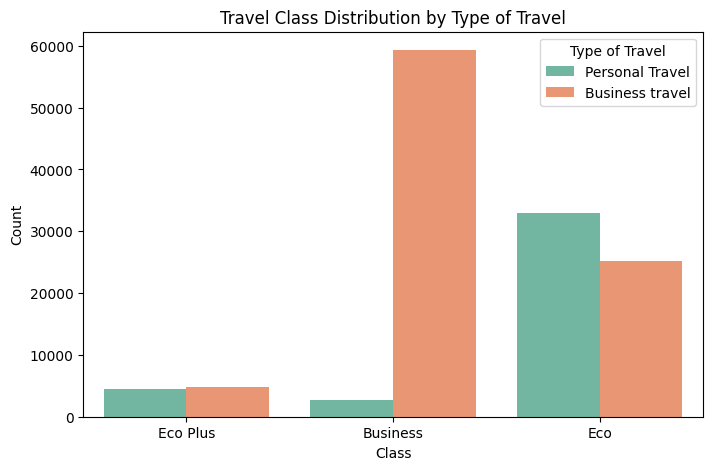

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', hue='Type of Travel', data=df, palette='Set2')
plt.title('Travel Class Distribution by Type of Travel')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
#most of the business travelers trvel on business class that means we could charge more on that
#Eco Plus almost Equaled
#Personal travel is  Slightly larger than Business travel on Eco.

#the Relation Between Type of travel and Service Inflight

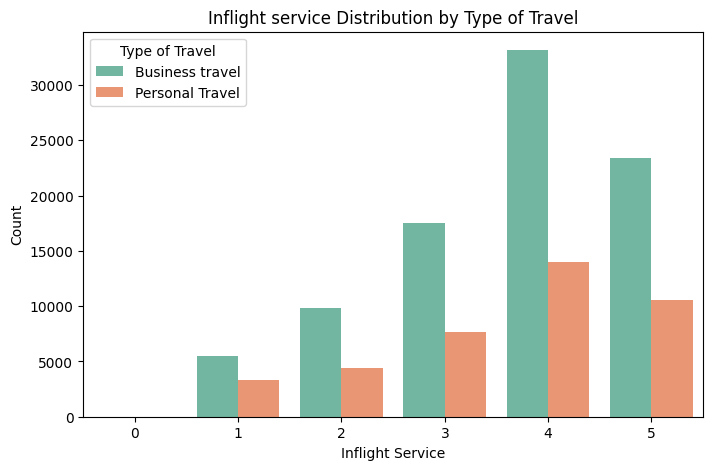

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Inflight service', hue='Type of Travel', data=df, palette='Set2')
plt.title('Inflight service Distribution by Type of Travel')
plt.xlabel('Inflight Service')
plt.ylabel('Count')
plt.show()

#That means the Inflight Service is almost better in bussiness travel
#most of passengers usually get rate 4 of 5 in the two types

#The correlation Between Cleanliness & Food and drink & Inflight & entertainment and Online boarding

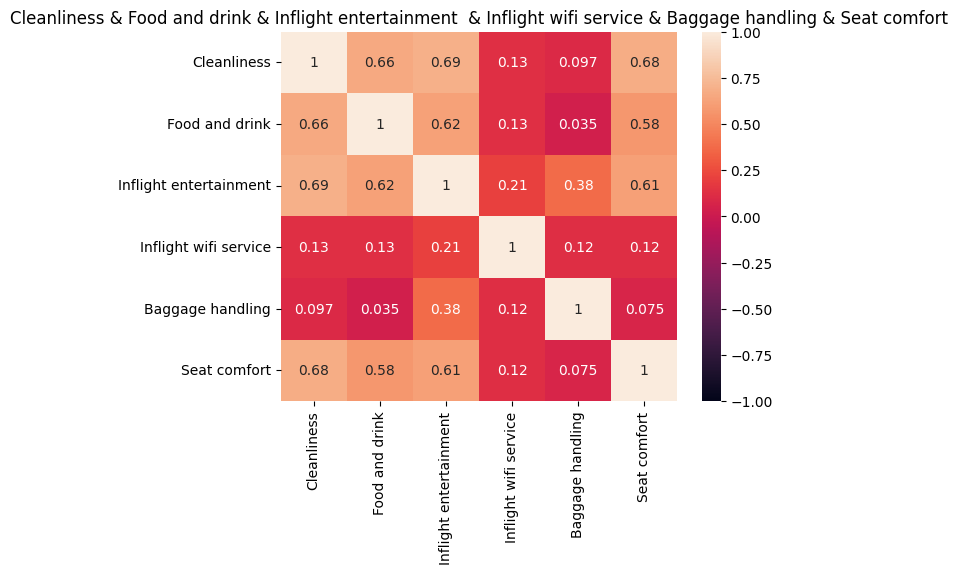

In [29]:
data_corrleated=df[['Cleanliness','Food and drink','Inflight entertainment','Inflight wifi service','Baggage handling','Seat comfort']]
sns.heatmap(data_corrleated.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Cleanliness & Food and drink & Inflight entertainment  & Inflight wifi service & Baggage handling & Seat comfort')
plt.show()
#that mean that food and drink &Inflight entertainment attached by Cleanliness
#Inflight entertainment attached and highly correlated with Food &cleanliness & Seat comfort
#Wifi has a bad relation with other features

#The Distance effect on Satisfaction

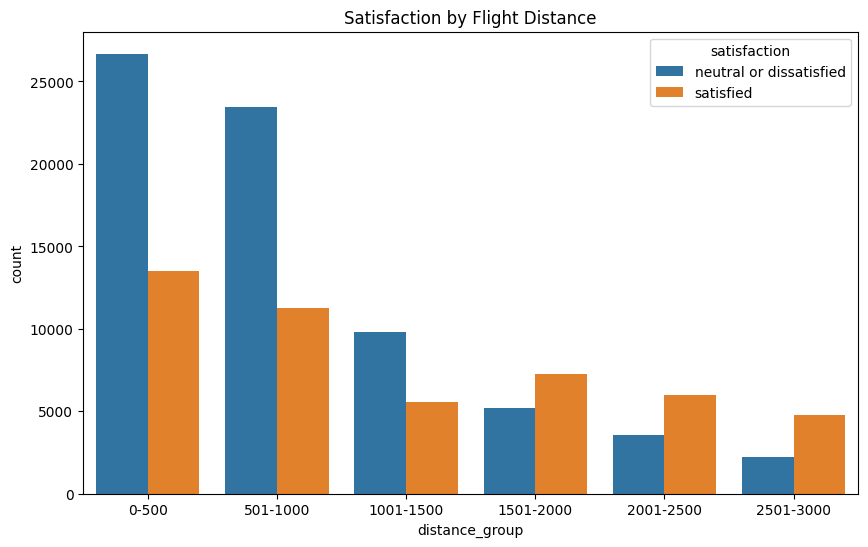

In [30]:
df['distance_group'] = pd.cut(df['Flight Distance'], bins=[0, 500, 1000, 1500, 2000, 2500, 3000], labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='distance_group',hue='satisfaction')
plt.title('Satisfaction by Flight Distance')
plt.show()
#This means that when the distance increases, the percentage of satisfaction increase
# passengers are almost neutralor dissatisfied in the short distance
# the airline is reling mostly on short distance flights

#The Distrbution of Age on Satisfication

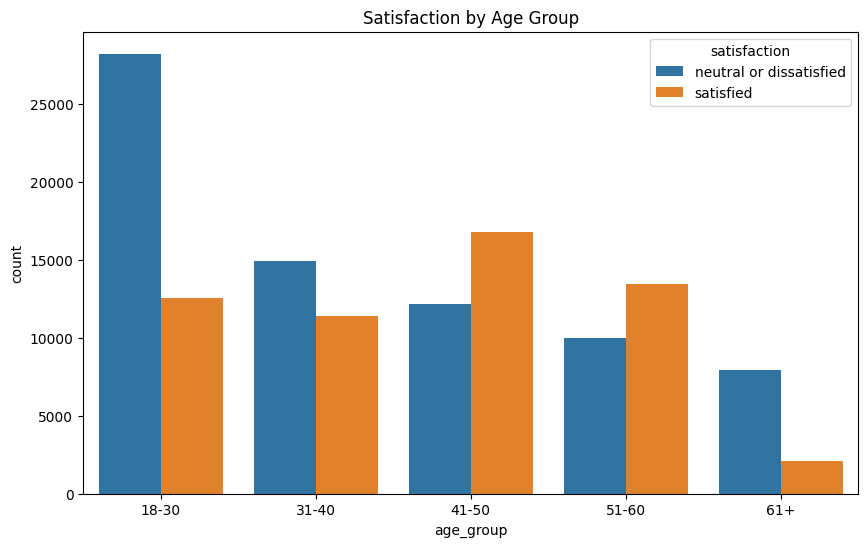

In [31]:
df['age_group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['18-30', '31-40', '41-50', '51-60', '61+'])

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='satisfaction')
plt.title('Satisfaction by Age Group')
plt.show()
#getting older means that you expect less and genrally happy
##Between Age 41 and 60 are more satisfied the  older and younger

In [32]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'distance_group', 'age_group'],
      dtype='object')

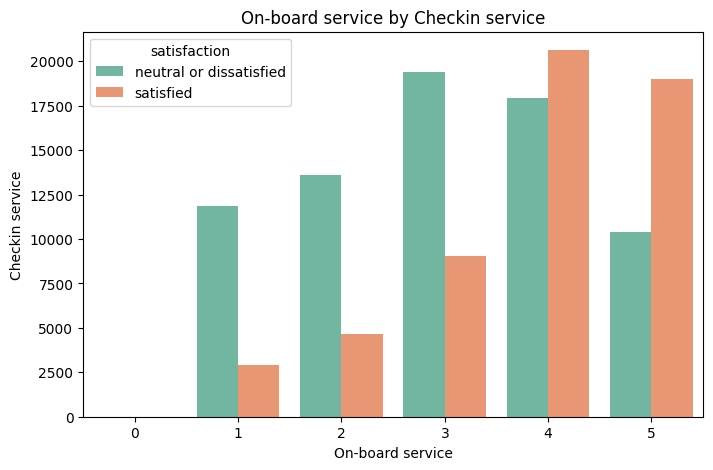

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='On-board service', hue='satisfaction', data=df, palette='Set2')
plt.title('On-board service by Checkin service')
plt.xlabel('On-board service')
plt.ylabel('Checkin service')
plt.show()

Text(0.5, 1.03, 'Age Distribution by Sex and Class')

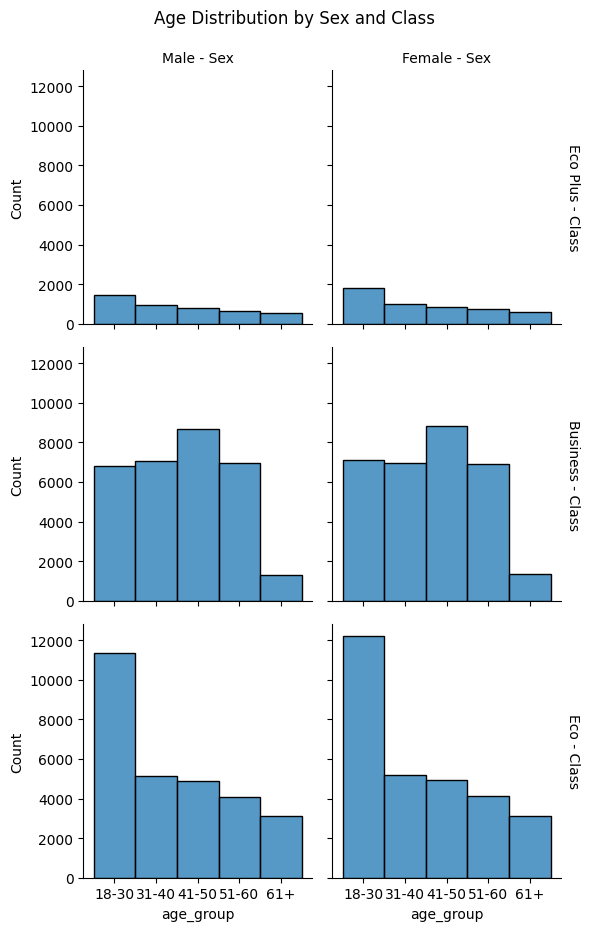

In [34]:
g = sns.FacetGrid(df, col='Gender', row='Class', margin_titles=True)
g.map(sns.histplot, 'age_group')
g.set_axis_labels("age_group", "Count")
g.set_titles(col_template="{col_name} - Sex", row_template="{row_name} - Class")
g.fig.suptitle("Age Distribution by Sex and Class", y=1.03)
#women are more in both the most satisfied age group and the most unsatisfied

In [35]:

from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoder = LabelEncoder()

categorical_columns = df_encoded.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,distance_group,age_group
0,1,0,13,1,2,460,3,4,3,1,...,3,4,4,5,5,25,18.0,0,0-500,18-30
1,1,1,25,0,0,235,3,2,3,3,...,5,3,1,4,1,1,6.0,0,0-500,18-30
2,0,0,26,0,0,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,1,1001-1500,18-30
3,0,0,25,0,0,562,2,5,5,5,...,5,3,1,4,2,11,9.0,0,501-1000,18-30
4,1,0,61,0,0,214,3,3,3,3,...,4,4,3,3,3,0,0.0,1,0-500,61+


#Showing the Correlation Matrix

In [36]:
df.drop(['age_group','distance_group'],axis=1,inplace=True)

In [37]:

x=df.drop(['satisfaction'],axis=1)
y=df['satisfaction']

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(k_neighbors=5,random_state=42)
x_res,y_res=smote.fit_resample(x,y)

In [39]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.3,random_state=42)
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.24,random_state=42)

In [40]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
x_train_sk=pt.fit_transform(x_train)
x_valid_sk=pt.transform(x_valid)
x_test_sk=pt.transform(x_test)

In [41]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train_sc=scaler.fit_transform(x_train_sk)
x_valid_sc=scaler.transform(x_valid_sk)
x_test_sc=scaler.transform(x_test_sk)

In [42]:
def check_overfitting(model,x_train,y_train,x_vald,y_vald):

        y_tr_pred=model.predict(x_train)
        train_accuracy=accuracy_score(y_train,y_tr_pred)
        train_recall=recall_score(y_train,y_tr_pred)
        train_precision=precision_score(y_train,y_tr_pred)
        
        y_val_pred=model.predict(x_vald)
        valid_accuracy=accuracy_score(y_vald,y_val_pred)
        valid_recall=recall_score(y_vald,y_val_pred)
        valid_precision=precision_score(y_vald,y_val_pred)
       
        print("Model Metrics for CheckingOverfitting")
        print(f"Accuracy_ train {train_accuracy}")
        print(f"Accuracy_ validation {valid_accuracy}")

        print(f"recall_ train {train_recall}")
        print(f"recall_ validation {valid_recall}")


        print(f"precision_ train {train_precision}")
        print(f"precision_ validation {valid_precision}")
       

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()

params={
    'solver':['liblinear','sag','saga'],
    'max_iter':[1000, 5000, 10000],
     'C':[0.1,1,10]

}

grid=GridSearchCV(
    estimator=log_model,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

grid.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'max_iter': [1000, 5000, 10000],
                         'solver': ['liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [44]:
ll=grid.best_estimator_

In [45]:
check_overfitting(ll,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.8750369010794368
Accuracy_ validation 0.873679076572915
recall_ train 0.8673896841510113
recall_ validation 0.8630470016207455
precision_ train 0.8806063610509562
precision_ validation 0.8824991713622804


In [46]:
def compare_model(model,x_train,y_train):

        y_tr_pred=model.predict(x_train)
        train_accuracy=accuracy_score(y_train,y_tr_pred)
        train_recall=recall_score(y_train,y_tr_pred)
        train_precision=precision_score(y_train,y_tr_pred)

   

        return train_accuracy

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params={
    'n_neighbors':[3,5,7,9,11],
    'p':[1,2]
}

knn=KNeighborsClassifier()

grid=GridSearchCV(
    estimator=knn,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

grid.fit(x_train_sc, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]},
             scoring='accuracy')

In [48]:
grid.best_params_

{'n_neighbors': 9, 'p': 1}

In [49]:
knn=KNeighborsClassifier(n_neighbors=18,p=1)
knn.fit(x_train_sc,y_train)
check_overfitting(knn,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9340016172299161
Accuracy_ validation 0.9275727523979841
recall_ train 0.9093829508365244
recall_ validation 0.9007293354943274
precision_ train 0.9563255047160888
precision_ validation 0.9522789581905414


In [50]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)

params={
    'criterion':['entropy','gini'],
    'max_depth':[3,4,5,6,7,8,9,10]
}

grid=GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=5
)

grid.fit(x_train_sc,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [51]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10}

In [52]:
from sklearn.naive_bayes import GaussianNB
classsifier1=GaussianNB()
classsifier1.fit(x_train_sc,y_train)
check_overfitting(classsifier1,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.8736763743245498
Accuracy_ validation 0.8716875304828483
recall_ train 0.8398653337102618
recall_ validation 0.8363047001620746
precision_ train 0.9004987462456256
precision_ validation 0.9007593610892904


In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [55]:
classsifier2=LogisticRegression()
classsifier3=RandomForestClassifier( criterion='entropy'
                                    , n_estimators=50,max_depth=10,max_features='sqrt',
    random_state=42)
classsifier4=DecisionTreeClassifier(criterion='entropy', max_depth=4)

classsifier2.fit(x_train_sc,y_train)
classsifier3.fit(x_train_sc,y_train)
classsifier4.fit(x_train_sc,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [56]:
check_overfitting(classsifier2,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.8748828791826572
Accuracy_ validation 0.8735571451796456
recall_ train 0.8675695818663103
recall_ validation 0.863128038897893
precision_ train 0.8801919015461632
precision_ validation 0.8822165161931583


In [57]:
check_overfitting(classsifier3,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9425498325011873
Accuracy_ validation 0.9383027150056902
recall_ train 0.9354681195548816
recall_ validation 0.9299837925445705
precision_ train 0.9487814414179591
precision_ validation 0.9460840890354493


In [58]:
check_overfitting(classsifier4,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.8860109612249875
Accuracy_ validation 0.8868476670460088
recall_ train 0.893372054174912
recall_ validation 0.8960291734197731
precision_ train 0.880184331797235
precision_ validation 0.8804745978659022


In [59]:
final_model=SVC()
final_model.fit(x_train_sc,y_train)

SVC()

In [60]:
check_overfitting(final_model,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9510595422982634
Accuracy_ validation 0.9482198016582669
recall_ train 0.9439490118475495
recall_ validation 0.9408427876823339
precision_ train 0.957457901047912
precision_ validation 0.9552410728978115


<Axes: >

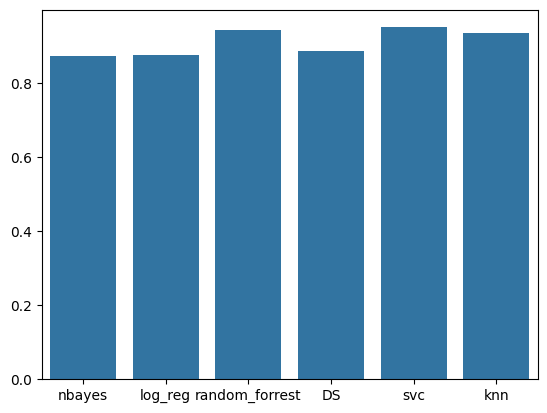

In [61]:
model_names=['nbayes','log_reg','random_forrest','DS','svc','knn']
score=[compare_model(classsifier1,x_train_sc,y_train),compare_model(classsifier2,x_train_sc,y_train),compare_model(classsifier3,x_train_sc,y_train),compare_model(classsifier4,x_train_sc,y_train),compare_model(final_model,x_train_sc,y_train),compare_model(knn,x_train_sc,y_train)]
sns.barplot(x=model_names, y=score)

Ensambel methods from our cahmpion models


In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.base import BaseEstimator


In [63]:
estimators=BaseEstimator()

In [64]:
from sklearn.ensemble import VotingClassifier
estimators=[('log_reg',LogisticRegression())  , ('nb',GaussianNB())]

In [65]:
voting_clf=VotingClassifier(estimators=estimators)

In [66]:
bagging=BaggingClassifier( n_estimators=50,
   
   max_samples=0.4,
    random_state=42
)
    

In [67]:
bagging.fit(x_train_sc,y_train)

BaggingClassifier(max_samples=0.4, n_estimators=50, random_state=42)

In [68]:
check_overfitting(bagging,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9841357446316952
Accuracy_ validation 0.9575678751422533
recall_ train 0.9778211816709927
recall_ validation 0.9445705024311183
precision_ train 0.9902917675229692
precision_ validation 0.9700399467376831


In [69]:
from sklearn.ensemble import StackingClassifier

In [70]:
estimators = [
    ('svc', SVC()),
    ('rf', RandomForestClassifier(n_estimators=100))
]

# Meta learner
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(x_train_sc, y_train)

StackingClassifier(estimators=[('svc', SVC()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [71]:
check_overfitting(stacking_model,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9999871648419351
Accuracy_ validation 0.9587871890749472
recall_ train 1.0
recall_ validation 0.9508914100486223
precision_ train 0.9999743009868421
precision_ validation 0.9663976280678637


In [72]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


param_grid = {
    'lambda': [0.1, 1, 10],
    'alpha': [0.1, 1, 10],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'learning_rate': [0.01, 0.1, 0.3]

}

xgb_model = xgb.XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(x_train_sc, y_train)

# Best parameters
print(grid_search.best_params_)


{'alpha': 0.1, 'lambda': 1, 'learning_rate': 0.3, 'max_depth': 7, 'min_child_weight': 1}


In [73]:
best_params = grid_search.best_params_

In [74]:
xgb_best = xgb.XGBClassifier(alpha=best_params['alpha'],
    max_depth=best_params['max_depth'],
    min_child_weight=best_params['min_child_weight'],
    learning_rate=best_params['learning_rate'],
    )
    

    


In [75]:
xgb_best.fit(x_train_sc,y_train)

XGBClassifier(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
check_overfitting(xgb_best,x_train_sc,y_train,x_valid_sc,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.985547612018842
Accuracy_ validation 0.9615103235246302
recall_ train 0.9808794428310761
recall_ validation 0.9520259319286872
precision_ train 0.9900905341253988
precision_ validation 0.9706684293150458


<Axes: >

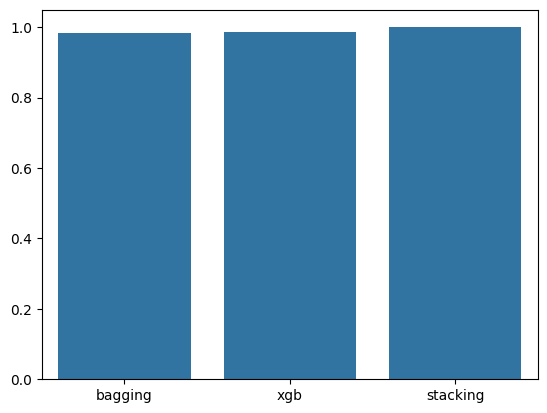

In [77]:
models=['bagging','xgb','stacking']
scores=[compare_model(bagging,x_train_sc,y_train),compare_model(xgb_best,x_train_sc,y_train),compare_model(stacking_model,x_train_sc,y_train)]
sns.barplot(x=models, y=scores)

In [78]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif


In [86]:
fsm=SelectKBest(mutual_info_classif,k=10)
fsm.fit(x_train_sc,y_train)
x_train_selected=fsm.transform(x_train_sc)
x_valid_selected=fsm.transform(x_valid_sc)
x_test_selected=fsm.transform(x_test_sc)

In [87]:
bagging.fit(x_train_selected,y_train)
xgb_best.fit(x_train_selected,y_train)
stacking_model.fit(x_train_selected,y_train)

StackingClassifier(estimators=[('svc', SVC()),
                               ('rf', RandomForestClassifier())],
                   final_estimator=LogisticRegression())

In [88]:
check_overfitting(bagging,x_train_selected,y_train,x_valid_selected,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9696063457021473
Accuracy_ validation 0.9326125833197854
recall_ train 0.9608079977384287
recall_ validation 0.9203403565640195
precision_ train 0.9779486777054069
precision_ validation 0.9438996010638298


In [89]:
check_overfitting(bagging,x_train_selected,y_train,x_valid_selected,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9696063457021473
Accuracy_ validation 0.9326125833197854
recall_ train 0.9608079977384287
recall_ validation 0.9203403565640195
precision_ train 0.9779486777054069
precision_ validation 0.9438996010638298


In [90]:
check_overfitting(xgb_best,x_train_selected,y_train,x_valid_selected,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.9509696961918086
Accuracy_ validation 0.9365143879044058
recall_ train 0.9435892164169515
recall_ validation 0.9279578606158833
precision_ train 0.9576171722177304
precision_ validation 0.9444902672385351


In [91]:
check_overfitting(stacking_model,x_train_selected,y_train,x_valid_selected,y_valid)

Model Metrics for CheckingOverfitting
Accuracy_ train 0.966628589031074
Accuracy_ validation 0.9342383352300438
recall_ train 0.9618873840302228
recall_ validation 0.9280388978930308
precision_ train 0.9710208846802438
precision_ validation 0.9400755212608767


<Axes: >

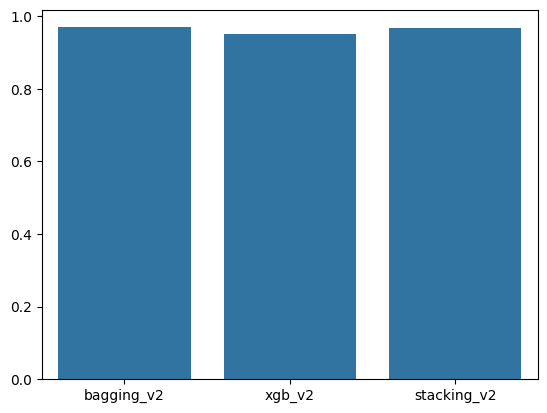

In [92]:
models=['bagging_v2','xgb_v2','stacking_v2']
scores=[compare_model(bagging,x_train_selected,y_train),compare_model(xgb_best,x_train_selected,y_train),compare_model(stacking_model,x_train_selected,y_train)]
sns.barplot(x=models, y=scores)

In [93]:
cat_features=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_features.append(col)

In [94]:
import pickle as pkl
pkl.dump(scaler,open('scaler.pkl','wb'))


In [95]:
from sklearn.preprocessing import LabelEncoder
for col in cat_features:

    le=LabelEncoder()

    df[col]=le.fit_transform(df[col])

    pkl.dump(le,open("{}_le.pkl".format(col),"wb"))


In [96]:
pkl.dump(classsifier3,open('svc.pkl',"wb"))
pkl.dump(xgb_best,open('xgb.pkl',"wb"))